# Introduction to Data Science
## Homework 5

Student Name: Zhifan Nan

Student Netid: zn2041
***

### Part 1: Naive Bayes (5 Points)

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful, and use the bias-variance tradeoff to justify its use. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

Answer: Laplace smoothing is like regularization. By introducing small bias to the model, it provides the model with better generalization ability. For example, in our training corpus, we have different categories of documents, let's say one of which is sport articles. However, none of them includes the word "Ping Pong", so after training our model on this corpus, we get P("Ping Pong"|sport documents) = 0. When we go to the testing corpus, if there are some documents contained the word "Ping Pong", these documents will have a zero probability being classified as sport category simply because P("Ping Pong"|sport documents) = 0. If we apply Laplace smoothing, although P("Ping Pong"|sport documents) still has a low probability, other words in that document such as "Olympics", "semi-finals", etc will helps us classifiy this document to sport category because their higher probability being in sport documents.

### Part 2: Text classification for sentiment analysis (20 Points)
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1 (1 Point) \. Load the data into a pandas `DataFrame()`.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
imdb = pd.read_csv("imdb.csv")
imdb.dropna(inplace=True)
imdb.head()

,Text,Class
0,'One of the first of the best musicals Anchors...,P
1,'Visually disjointed and full of itself the di...,N
2,'These type of movies about young teenagers st...,P
3,'I would rather of had my eyes gouged out with...,N
4,'The title says it all. Tail Gunner Joe was a ...,N


2 (1 Point)\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [9]:
imdb = imdb.replace({"Class": {'P':1, 'N':0}})
imdb.head()

,Text,Class
0,'One of the first of the best musicals Anchors...,1
1,'Visually disjointed and full of itself the di...,0
2,'These type of movies about young teenagers st...,1
3,'I would rather of had my eyes gouged out with...,0
4,'The title says it all. Tail Gunner Joe was a ...,0


3 (2 Points)\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. Feel free to use any function from sklearn.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X, Y = imdb[['Text']], imdb[['Class']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

4 (5 Points)\. Create a binary `CountVectorizer()` and a binary `TfidfVectorizer()`. Use the original single words as well as bigrams (in the same model). Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. Hint - look at the API documentation for both vectorizers to see what we mean by "binary."

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
X_train, X_test = X_train['Text'].values.tolist(), X_test['Text'].values.tolist()
y_train, y_test = Y_train['Class'].values.reshape(-1), Y_test['Class'].values.reshape(-1)

In [14]:
count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2), binary=True)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

In [121]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2), binary=True)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

5 (6 Points)\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both vectorizers defined above. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

Extra credit (2 points): Do any of the options perform identically? If so, can you explain why?

In [123]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8

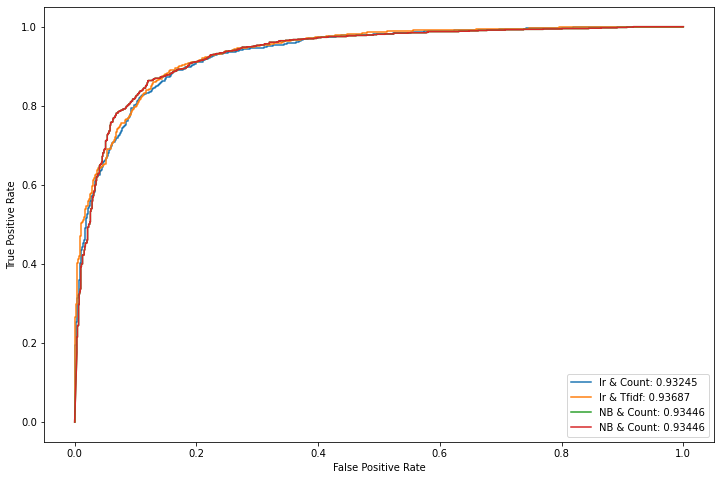

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn import metrics

lr = LogisticRegression()
lr.fit(X_train_count, y_train)
y_pred = lr.predict_proba(X_test_count)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred[:, 1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='lr & Count: {:.5f}'.format(roc_auc))

lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
y_pred = lr.predict_proba(X_test_tfidf)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred[:, 1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='lr & Tfidf: {:.5f}'.format(roc_auc))

NB = BernoulliNB()
NB.fit(X_train_count, y_train)
y_pred = NB.predict_proba(X_test_count)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred[:, 1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='NB & Count: {:.5f}'.format(roc_auc))

NB = BernoulliNB()
NB.fit(X_train_tfidf, y_train)
y_pred = NB.predict_proba(X_test_tfidf)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred[:, 1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='NB & Count: {:.5f}'.format(roc_auc))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Answer: LogisticRegression with the TfidfVectorizer is the model that performs slightly better than the other three. The reason is mostly because the TfidfVectorizer penalizes those words that appear too often in our training corpus, which provides extra information that CountVectorizer does not provide. What's more, the Naive Bayesian Classifier made the underlying assumption that words in one document are independent of each other, which apparently is not true.

The two models with the Naive Bayesian Classifier perform identically because BernoulliNB is designed for binary/boolean features, which means that although the TfidfVectorizer provides numerical scores for each word, the classifier treats them as 1 or 0 just like how it treats the binary count given by CountVectorizer, which wastes the extra information provided by TdidfVectorizer and make their performance identical to each other. If we would like to take the tfidf score into account, we can use the MultinomialNB to replace the BernoulliNB classifier, which will give us a better result.

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples were labeled positive, but were incorrectly classified as negative. Print out the reviews below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [168]:
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
y_pred = lr.predict(X_test_tfidf)

In [171]:
incorrect_idx = [i for i in range(len(y_pred)) if y_test[i] == 1 and y_pred[i] == 0]
for i in incorrect_idx[-5:]:
    print(f"{i}: {X_test[i]}\n")

2049: 'Richard Widmark is a tainted character in this movie. He is a professional pickpocket. Hes been in prison three times yet at the beginning of the film he tries to make it four. Thelma Ritter is a busy body selling information to almost everybody. Jean Peters is amazing as the girl flamed by Widmark. This is a period piece during the McCarthy era where the Red Scare ruled the politics and is worked into this plot quite nicely. What is unusual about this film is that Peters & Ritter are both victims of violent beatings in an era where women were seldom more than sex objects in films. This is what makes this film noir as women often got different roles in this type of film. The film is only 87 minutes long and was obviously made by Fox as the under card for double features in the theater. The sets show it is a limited budget film. The script made J Edgar Hoover mad because patriotism is given short shrift. Hoover wanted it changed. Instead it became a B under card picture that was 

Answer: Some wording in these positive reviews can be misleading for a classifier, for example, "silly" in review 5, "fooled" in review 4, "misnomer" in review 3, "shot cheaply" in review 2, "limited budget" in review 1, and etc. Putting them into contexts, we can see these words are actually conveying some facts or even positive sentiments regarding the movie, but looking at them individually as single words or bigram words like the classifier does, they are strongly correlated with negative sentiments, and that's why our classifier misclassifies these reviews.

Explanation for the 5 reviews chosen here!